# Relatório Simulação 3 - Ecologia
## Modelo Presa-Predador

#### Ana Clara Mueller Miranda, RA: 148806
#### Bruno Pires Moreira Silva, RA: 139892
#### Jonatas Carrocine, RA: 143472

Link do vídeo:

https://clipchamp.com/watch/mCO2aVrX7hQ

##1. Introdução

O projeto 3 tem como objetivo definir e simular uma rede trófica entre 6 espécies, mostrando como cada espécie vai se comportar durante a linha do tempo, até todas elas se estabilizarem, garantindo o equilíbrio ecológico da nossa cadeia. Temos espécies produtoras e consumidores, onde espécies produtoras são organismo autotróficos (neste caso o capim) e as espécies consumidoras são organismos heterotróficos que se alimentam direta ou indiretamente dos produtores (neste caso as vacas, os humanos, as cobras, os aliens e os zumbies). Em nossa rede trófica temos que:
- Vacas são consumidores primários
- Humanos são consumidores secundários (indo pelo caminho capim-vaca-humano) e consumidores terciários (indo pelo caminho capim-vaca-cobra-humano)
-Aliens são consumidores secundários (indo pelo caminho capim-vaca-aliens) e consumidores terciários (indo pelo caminho capim-vaca-humano-alien)
- Cobras são consumidores secundários (indo pelo caminhao capim-vaca-cobra)
- Zumbies são consumidores terciários (indo pelo caminho capim-vaca-humano-zumbi) e consumidores quartenários (indo pelo caminho capim-vaca-cobra-humano-zumbi)

## 2. Classes e modelo matemático

A rede trófica terá 6 espécies, nos quais foram especificadas na imagem abaixo:



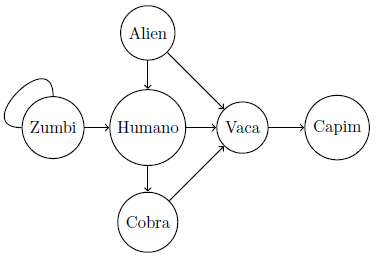

Observando o grafo acima, podemos ter algumas conclusões:
*   A espécie vaca se alimenta de capim;
*   A espécie alien se alimenta de humano e vaca;
*   A espécie humano se alimenta de vaca e cobra;
*   A espécie cobra se alimenta de vaca;
*   A espécie zumbi se alimenta de humano e também de zumbi.

As seguintes equações descrevem o modelo matemático para a rede trófica que será simulada:

$$\frac{dAlien}{dt} = Alien(-t_0 + p_1Humano + p_2Vaca)$$

$$\frac{dCapim}{dt} = Capim(t_1 -\frac{t_1Capim}{K}+ -p_3Vaca)$$

$$\frac{dCobra}{dt} = Cobra(-t_2 + -p_4Humano + p_5Vaca)$$

$$\frac{dHumano}{dt} = Humano(-t_3 + -p_6Alien-p_7Zumbi + p_8Vaca + p_9Cobra)$$

$$\frac{dVaca}{dt} = Vaca(-t_4 + -p_{10}Alien - p_{11}Humano - p_{12}Cobra + p_{13}Capim)$$

$$\frac{dZumbi}{dt} = Zumbi(-t_5 + -p_{14} Zumbi + p_{15}Zumbi +p_{16}Humano)$$

Temos também que: 

\
$K$ - Constante que limita o crescimento da espécie
\
\
$p_x, t_x$ - São os x parâmetros que representam a taxa de crescimento das  espécies



# 3. Desenvolvimento do código

Nesta parte é realizado a programação onde serão definidos os parâmetros e também os modelos matemáticos de cada espécie na rede trófica, e os valores obtidos de cada espécie serão armazenados em seus respectivos vetores.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class especies:
  def __init__(self,arrP,arrT):
    self.Alien = 1
    self.Capim = 1
    self.Cobra = 1
    self.Humano = 1 
    self.Vaca = 1
    self.Zumbi = 1
    self.p = arrP
    self.t = arrT
    self.K=10

    self.AlienArr = [self.Alien]
    self.CapimArr = [self.Capim]
    self.CobraArr = [self.Cobra]
    self.HumanoArr = [self.Humano]
    self.VacaArr = [self.Vaca]
    self.ZumbiArr = [self.Zumbi]
    

  def dAlien(self, step):
    dAlien = self.Alien*(self.t[0]*(-1) + self.p[1]*self.Humano + self.p[2]*self.Vaca)*step
    self.Alien += dAlien
    if (self.Alien<=0.01):
      self.Alien = 0
    self.AlienArr.append(self.Alien)

  def dCapim(self, step):
    dCapim = self.Capim*(self.t[1] - self.t[1]*self.Capim/self.K +self.p[3]*self.Vaca*-1)*step
    self.Capim+=dCapim
    if (self.Capim<=0.01):
      self.Capim = 0
    self.CapimArr.append(self.Capim)

  def dCobra(self, step):
    dCobra = self.Cobra*(self.t[2]*-1 + self.p[4]*self.Humano*-1 + self.p[5]*self.Vaca)*step
    self.Cobra+=dCobra
    if (self.Cobra<=0.01):
      self.Cobra = 0
    self.CobraArr.append(self.Cobra)

  def dHumano(self, step):
    dHumano = self.Humano*(self.t[3]*-1 + self.p[6]*self.Alien*-1 + self.p[7]*self.Zumbi*-1 +self.p[8]*self.Vaca + self.p[9]*self.Cobra)*step
    self.Humano+=dHumano
    if (self.Humano<=0.01):
      self.Humano = 0
    self.HumanoArr.append(self.Humano)

  def dVaca(self, step):    
    dVaca = self.Vaca*(self.t[4]*-1 + self.p[10]*self.Alien*-1 + self.p[11]*self.Humano*-1 + self.p[12]*self.Cobra*-1 +self.p[13]*self.Capim)*step
    self.Vaca +=dVaca
    if (self.Vaca<=0.01):
      self.Vaca = 0
    self.VacaArr.append(self.Vaca)

  def dZumbi(self, step):
    dZumbi = self.Zumbi*(self.t[5]*-1 + self.p[14]*self.Zumbi*-1 + self.p[15]*self.Zumbi + self.p[16]*self.Humano)*step
    self.Zumbi+=dZumbi
    if (self.Zumbi<=0.01):
      self.Zumbi = 0
    self.ZumbiArr.append(self.Zumbi)


#-------------------- plot ------------------ 

def plot(simulacao):
  plt.figure(figsize=(20,6))
  plt.plot(t, simulacao.AlienArr,color='green',label = 'Alien')
  plt.plot(t, simulacao.CapimArr,color = 'yellow',label = "Capim")
  plt.plot(t, simulacao.CobraArr,color = 'blue',label = "Cobra")
  plt.plot(t, simulacao.HumanoArr, color='red',label = "Humano")
  plt.plot(t, simulacao.VacaArr, color = 'pink',label = "Vaca")
  plt.plot(t, simulacao.ZumbiArr,color='lime',label = "Zumbi")
  plt.legend(loc='upper right')
  plt.grid(color='black',axis='y', linestyle='dotted', linewidth=1)
  plt.show()


# 4. Simulação e Discussão dos gráficos obtidos

### 4.1 - Espécies em equilíbrio

Na primeira simulação, todas as espécies começam com a mesma quantidade de indivíduos, no decorrer do tempo, elas tendem a ficar em equilíbrio, sem diminuir ou aumentar as populações depois de certo tempo.

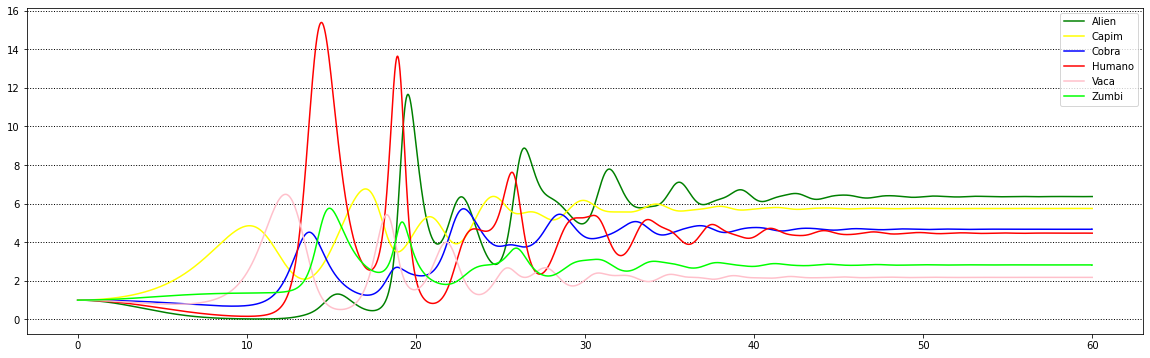

In [ ]:
simulacao = especies([0,                                 #não utilizado
              1/10000,3/10000,                           #alien
              5/40000,                                   #capim
              2/100000,2.75/20000,                       #cobra
              1/10000,1/25000,14/50000,4/21000,          #Humano
              1/40000, 1/20000,1/10000,2/10000,          #vaca
              4/10000,1/10000,1/10000                    #zumbi
              ],
              [1.1/1000,                                 #alien
              32/50000,                                  #Capim
              4.2/20000,                                 #Cobra
              7.5/10000,                                 #Humano
              3/10000,                                   #Vaca
              -4/10000                                   #Zumbi
              ]
              )
step = 0.01
t =[]
for i in np.arange(0,60, step):
  simulacao.dAlien(i)
  simulacao.dCapim(i)
  simulacao.dCobra(i)
  simulacao.dHumano(i)
  simulacao.dVaca(i)
  simulacao.dZumbi(i)
  t.append(i)
t.append(i)

plot(simulacao)

### 4.2 - Alienígenas dominando as outras espécies

Nesta simulação, temos a espécie Alien que acaba apresentando uma taxa de consumo maior para a espécie Humano e ligeiramente menor para a espécie Vaca, neste cenário, temos que:

*   Os aliens se beneficiam mais dos seres humanos e menos das vacas
  * Mais cobras, o que segura o aumento das vacas; 
  * Menos humanos e menos zumbis.



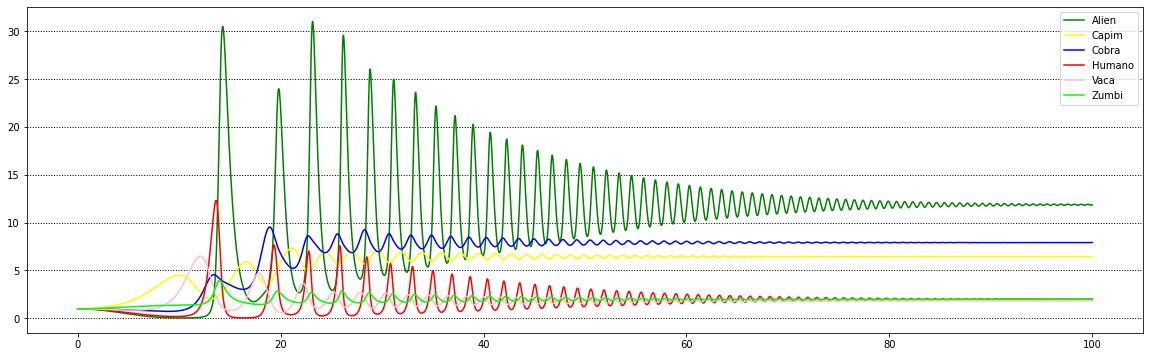

In [ ]:
simulacao2 = especies([0,                                #não utilizado
              3/10000,2.75/10000,                        #alien
              5/40000,                                   #capim
              2/100000,2.75/20000,                       #cobra
              1/10000,1/25000,14/50000,4/21000,          #Humano
              0.5/40000, 1/20000,1/10000,2/10000,        #vaca
              4/10000,1/10000,1/10000                    #zumbi
              ],
              [1.1/1000,                                 #alien
              32/50000,                                  #Capim
              4.2/20000,                                 #Cobra
              7.5/10000,                                 #Humano
              2.5/10000,                                 #Vaca
              -4/10000                                   #Zumbi
              ]
              )
step = 0.01
t =[]
for i in np.arange(0,100, step):
  simulacao2.dAlien(i)
  simulacao2.dCapim(i)
  simulacao2.dCobra(i)
  simulacao2.dHumano(i)
  simulacao2.dVaca(i)
  simulacao2.dZumbi(i)
  t.append(i)
t.append(i)

plot(simulacao2)

### 4.3 - Apocalipse Zumbi

Neste cenário, temos a espécie Zumbi que se torna mais resistente:

  * Zumbi apresenta um consumo menor de zumbi.
  * Como vai ter menos humanos, a população de vacas iriam aumentar. Os aliens servirão para controlar isso, se beneficiando um pouco mais de humanos.
  * A taxa de "regeneração" de zumbis irá sempre crescer. Note que t5 está negativo em todas as simulações, o que nos garante ao menos um zumbi sempre, pois eles não morrem. 

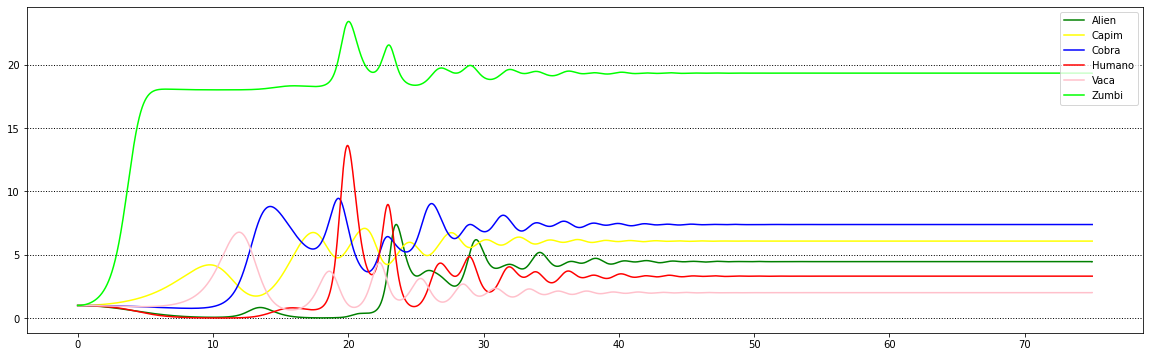

In [ ]:
simulacao3 = especies([0,                                #não utilizado
              1.2/10000,3/10000,                         #alien
              5/40000,                                   #capim
              2/100000,2.75/20000,                       #cobra
              1/10000,1/25000,14/50000,4/21000,          #Humano
              1/40000, 1/20000,1/10000,2/10000,          #vaca
              3.5/10000,1/10000,1/10000                  #zumbi
              ],
              [1/1000,                                 #alien
              32/50000,                                #Capim
              4.2/20000,                               #Cobra
              7.5/10000,                               #Humano
              2/10000,                                 #Vaca
              -4.5/1000                                #Zumbi
              ]
              )
step = 0.01
t =[]
for i in np.arange(0,75, step):
  simulacao3.dAlien(i)
  simulacao3.dCapim(i)
  simulacao3.dCobra(i)
  simulacao3.dHumano(i)
  simulacao3.dVaca(i)
  simulacao3.dZumbi(i)
  t.append(i)
t.append(i)

plot(simulacao3)

### 4.4 - Humanos controlam o cenário 

No cenário apresentando, a espécie Humanos terá um domínio maior sobre a rede trófica, no qual as espécies que se alimentam apresentam uma taxa menor de consumo, neste caso:

* Humano se beneficia mais das cobras;
* Menos zumbis;
* Mais vacas (vaca se beneficia mais do capim);
* Menos aliens (t0 maior).

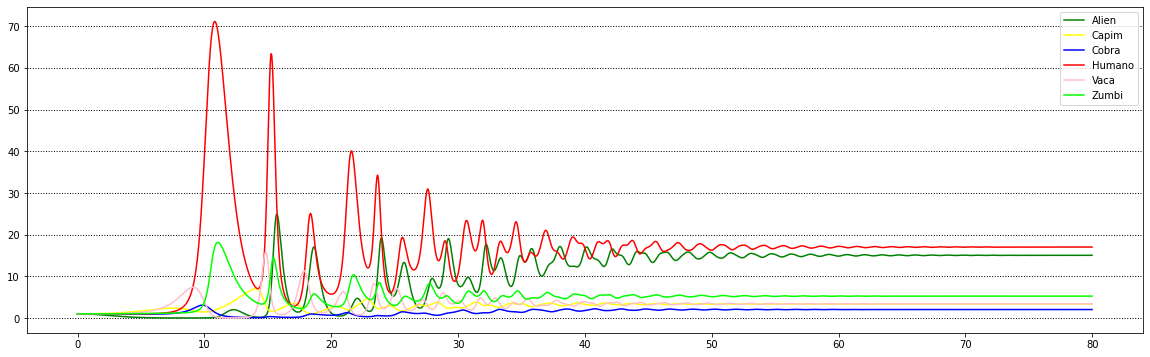

In [ ]:
simulacao4 = especies([0,                                #não utilizado
              0.65/10000,2.7/10000,                      #alien
              5/40000,                                   #capim
              1.6/100000,2.75/20000,                     #cobra
              0.65/10000,1/250000,10/50000,10/21000,     #Humano
              1/40000, 1/20000,1/10000,5/10000,          #vaca
              4/10000,1/10000,0.75/10000                 #zumbi
              ],
              [20.242/10000,                             #alien
              32/50000,                                  #Capim
              3.9/20000,                                 #Cobra
              6.5/10000,                                 #Humano
              2.5/10000,                                 #Vaca
              -3/10000                                   #Zumbi
              ]
              )
step = 0.01
t =[]
for i in np.arange(0,80, step):
  simulacao4.dAlien(i)
  simulacao4.dCapim(i)
  simulacao4.dCobra(i)
  simulacao4.dHumano(i)
  simulacao4.dVaca(i)
  simulacao4.dZumbi(i)
  t.append(i)
t.append(i)

plot(simulacao4)

## 4.5 - Extinção das expécies

Vemos abaixo um cenário possível de extinção de espécies, neste caso com o zumbi e o capim sendo os sobreviventes, este cenário é possível pois o Zumbi se alimenta dele mesmo e de humanos então mesmo com a extinção da raça humana eles ainda teriam meios de sobreviver. Porém se tentarmos atingir o mesmo resultado só que com humanos veremos que não é possível, pois os humanos se alimentam de vacas ou de cobras, logo se houvessem a extinção dessas espécies o humano não teria alimento para sobreviver. Além disso caso o sobrevivente seja a cobra é necessário possuir também as vacas pois as cobras se alimentam de vacas, e obviamente o capim que é a fonte de alimento das vacas. Outro ponto a se notar é o zumbi, que não será extinguido pois ele se alimenta de humanos e de zumbis,logo sempre existirá essa espécie (a não ser que ocorra um fator externo que elimine todos de uma vez). E por último temos que considerar os aliens, como se alimentam de humanos e vacas para acontecer a extinção deles é necessário também que um fator externo ocorra (como por exemplo uma doença que afete somente os aliens). Se tentarmos atingir o resultado com qualquer outra espécie sempre teremos um obstáculo, por exemplo os aliens necessitam de comida (humanos ou vacas) para sobreviverem, logo não existe possibilidade de sobreviver somente os aliens e o capim, o mesmo ocorre com as cobras que necessitam das vacas para sobreviverem. Aparenta então que a vaca conseguiria atingir o mesmo resultado que os zumbis porém como dito anteriormente sempre existirá um zumbi visto que eles não morrem por causa de velhice, só morrem caso alguem os mate e em nossa rede trófica o zumbi não possui um predator sendo que o único jeito deles morrerem é quando comido por outro zumbi ou caso se matassem.

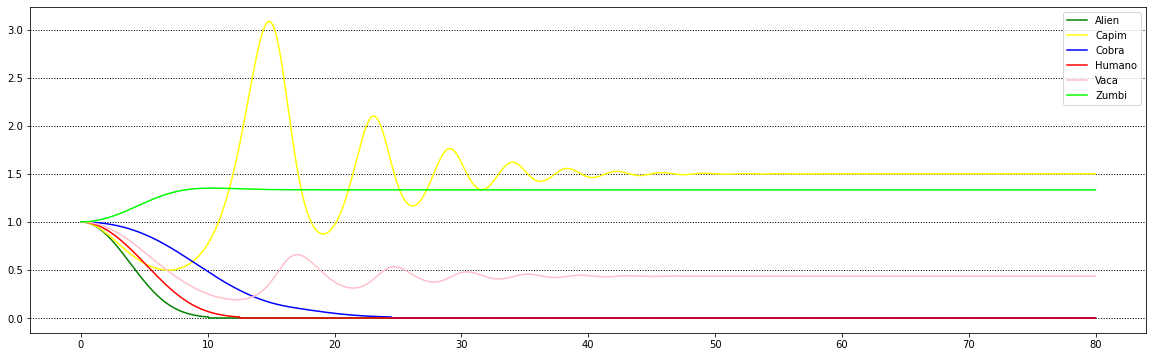

In [ ]:
simulacao5 = especies([0,                                #não utilizado
              1/10000,3/10000,                           #alien
              50/40000,                                  #capim
              2/100000,2.75/20000,                       #cobra
              1/10000,1/25000,14/50000,4/21000,          #Humano
              1/40000, 1/20000,1/10000,2/10000,          #vaca
              4/10000,1/10000,1/10000                    #zumbi
              ],
              [1.1/1000,                                 #alien
              32/50000,                                  #Capim
              4.2/20000,                                 #Cobra
              7.5/10000,                                 #Humano
              3/10000,                                   #Vaca
              -4/10000                                   #Zumbi
              ]
              )
step = 0.01
t =[]
for i in np.arange(0,80, step):
  simulacao5.dAlien(i)
  simulacao5.dCapim(i)
  simulacao5.dCobra(i)
  simulacao5.dHumano(i)
  simulacao5.dVaca(i)
  simulacao5.dZumbi(i)
  t.append(i)
t.append(i)

plot(simulacao5)